In [69]:
import math
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

<img src="./images/cover.png" width="300px">

# Particle Positions and Spatial Analysis with Python and Pandas

In this project, your job will be to implement a particle generator for a physics simulation experiment in a two-dimensional space. Each particle has an associated position (X, Y coordinates) and radius.

Your tasks will be to first write a generator of these random particles, and then analyze the data given different surfaces, displaying the particles that are within the given area.

This is a very common topic in physics and game design. It'll combine multiple interesting concepts, like (pseud) random number generation, plotting, and spatial analysis.

Let's get started!

### Section 1: Generating the data

The first part of the project requires you to create a data-generation tool to randomly generate the particles for our experiment. Each particle will have three randomly generated values:

* `x`: its position in the x-plane, can be between 0 and `MAX_X_POSITION`
* `y`: its position in the y-plane, can be between 0 and `MAX_Y_POSITION`
* `r`: its radius, between 0 and `MAX_PARTICLE_RADIUS`

For this, we'll use the `random` module from Python.

In order to validate that your solution is working right, we must "trick" the `random` module to always generate the same number. That is done with a given "seed". Check the following example. You can execute the following cell as many times as you want that it'll always generate the same value (not so much for randomness right?):

In [18]:
random.seed(10)
random.random()

0.5714025946899135

In [12]:
MAX_X_POSITION = 700
MAX_Y_POSITION = 500
MAX_PARTICLE_RADIUS = 5

##### Activity 1: Write a function that generates a random particle

Write the function `generate_particle` that generates a particle according to the previous definition. The function accepts three parameters `max_x`, `max_y`, `max_r` which by default take the constants above and returns a tuple with `(x, y, r)`

In [ ]:
def generate_particle(max_x=MAX_X_POSITION, max_y=MAX_Y_POSITION, max_r=MAX_PARTICLE_RADIUS):
    pass

Examples:

In [32]:
generate_particle()

(391.8484862104256, 92.86444985326192, 0.7227983373572378)

In [33]:
generate_particle(10, 10, 1)

(5.184593462659739, 3.5388971902026602, 0.8641652792107458)

Solution:

In [31]:
def generate_particle(max_x=MAX_X_POSITION, max_y=MAX_Y_POSITION, max_r=MAX_PARTICLE_RADIUS):
    return (
        random.random() * max_x,
        random.random() * max_y,
        random.random() * max_r,
    )

Assertions:

In [36]:
random.seed(100)
assert generate_particle() == (101.96847857289121, 227.46350225701067, 3.8539190282951106)

random.seed(100)
assert generate_particle(5, 5, 1) == (0.7283462755206516, 2.2746350225701066, 0.7707838056590222)

##### Activity 2: Generate 1,000 random particles using `random.seed(10)`

Generate **a list** of 1,000 random particles with the default values for `max_x`, `max_y` and `max_r`, and store them in the `particles` variable.

**IMPORTANT:** We'll validate your program by comparing it with the expected result of the same generation with `random.seed(10)`, so make sure you're using setting the correct seed before generating the particles

In [39]:
random.seed(10)
particles = ... # a list

Solution:

In [162]:
random.seed(10)
particles = [generate_particle() for _ in range(1_000)]

Assertions:

In [41]:
random.seed(10)
expected_particles = [generate_particle() for _ in range(1_000)]

assert particles == expected_particles, "Your `particles` doesn't seem to match what's expected"

##### Activity 3: Store your particles in a CSV file

Store the data from `particles` in a CSV file named `particles.csv`, with the header `x,y,r`. You can use any method, including Pandas, manual CSV handling, etc.

In [46]:
# store your particles in `particles.csv`

Here you can see the first rows of the expected `particles.csv`:

In [47]:
!head particles.csv

x,y,r
399.98181628293946,214.4445273375573,2.890456505672352
144.2687624976512,406.66062567866004,4.117944362667227
457.43077373082303,80.11477825940983,2.603346798199623
229.4409681354652,124.99833834320017,4.764084545729558
697.5898947776186,22.278191225216514,4.300805186431455
422.23342767772954,190.80299295955894,1.4180910895335757
472.4753929944692,228.41557552915282,3.4293074273729736
463.2924240366458,66.4890723561064,3.8391890697199527
687.6892743078336,484.6940802024594,3.066634102733545


Solution:

Probably the easiest solution is to use a DataFrame:

In [55]:
pd.DataFrame(particles, columns=['x', 'y', 'r']).to_csv('particles.csv', index=False)

But we could have also used a manual method using Python's builtin `csv` module:

In [45]:
import csv

In [53]:
with open('particles.csv', 'w') as fp:
    writer = csv.writer(fp, delimiter=',')
    writer.writerow(['x', 'y', 'r'])
    [writer.writerow(particle) for particle in particles]

Assertion:

In [56]:
expected_particles = pd.read_csv('expected_particles.csv')
student_particles = pd.read_csv('particles.csv')

from pandas.testing import assert_frame_equal

assert_frame_equal(expected_particles, student_particles)

##### Activity 4: Plot your particles in a matplotlib plane

Plot your particles in a dot-plot, each particle centered in `x`, `y` and with a marker size of `r`. It should look something like this:

<img src="images/plot-sample.png" width="900px">

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))

# your code here...

Solution:

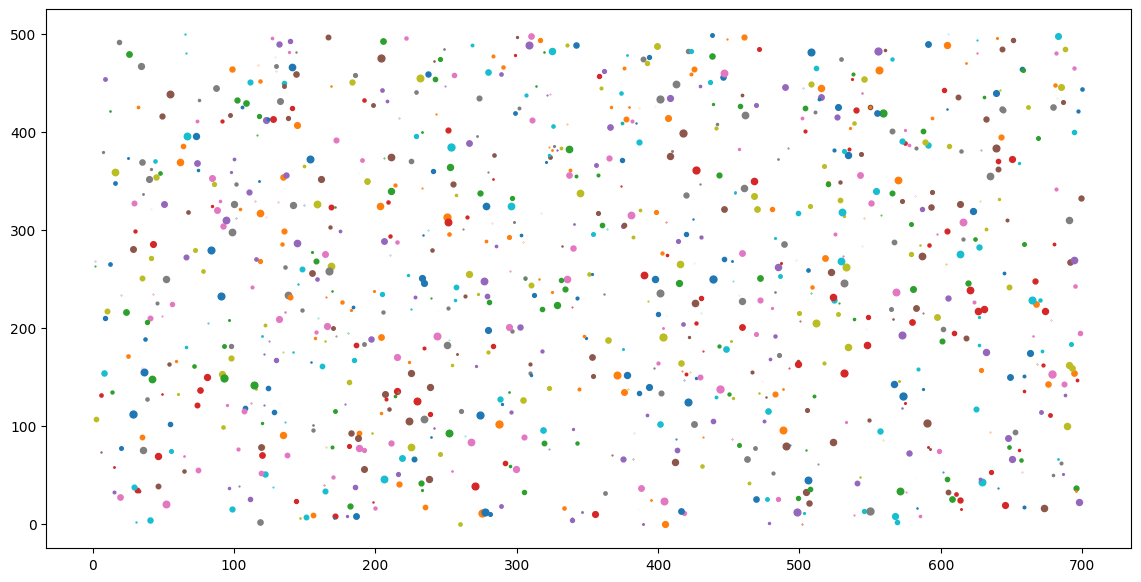

In [163]:
fig, ax = plt.subplots(figsize=(14, 7))

for (x, y, r) in particles:
    ax.plot(x, y, marker='o', markersize=r)

In [60]:
fig.savefig('expected_plot_1.png')

Assertions:

In [64]:
from matplotlib.testing import compare

fig.savefig('students_plot_1.png')
res = compare.compare_images('expected_plot_1.png', 'students_plot_1.png', tol=0)
res

### Section 2: Spatial analysis

In this section we'll focus on analyzing if a given particle is contained within a given circular area in the plane. In particular, we want to know if a particle `p` is outside of the area, partially contained, or completely contained within the area `A`. For example, the following image depicts the circular area A (big green circle) and three particles. `p1` is outside of the area, `p2` is completely contained in the area, while `p3` is only partially contained.

<img src="images/sample-contained-particles.png" width="900px">

##### Activity 5: Write the function `calculate_particle_position`

The function `calculate_particle_position` receives two tuples, with the particle's and area's `x, y, r` parameters and it should return the position of the particle (either completely contained, partially contained, or outside) in the form of an `Enum` as its defined below:

In [65]:
from enum import Enum

class ParticlePosition(Enum):
    PARTIALLY_CONTAINED = 1
    COMPLETELY_CONTAINED = 2
    OUTSIDE = 3

In [66]:
def calculate_particle_position(p, A):
    px, py, pr = p
    ax, ay, ar = A
    
    # your code here
    return ParticlePosition.COMPLETELY_CONTAINED

If you want to test your solution, your function should work in the following cases:

In [ ]:
# Should return: ParticlePosition.COMPLETELY_CONTAINED
calculate_particle_position((4,5,1), (6, 5, 3))

In [ ]:
# Should return: ParticlePosition.PARTIALLY_CONTAINED
calculate_particle_position((8,5,2), (6, 5, 3))

In [ ]:
# Should return: ParticlePosition.OUTSIDE
calculate_particle_position((1,1,2), (6, 5, 3))

And you can visualize the above examples with matplotlib using:

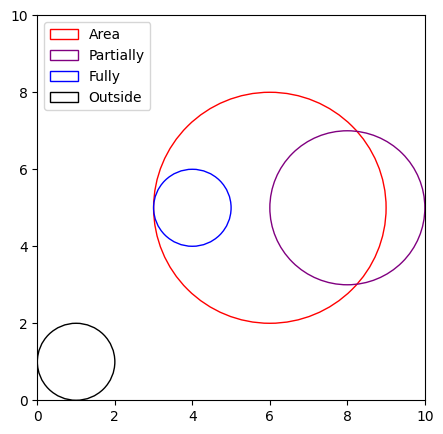

In [97]:
fig, ax = plt.subplots(figsize=(5, 5))

area = plt.Circle((6, 5), 3, color='r', fill=False, label='Area')
partial = plt.Circle((8, 5), 2, color='purple', fill=False, label='Partially')
fully = plt.Circle((4, 5), 1, color='blue', fill=False, label='Fully')
outside = plt.Circle((1, 1), 1, color='black', fill=False, label='Outside')

ax.add_patch(area)
ax.add_patch(partial)
ax.add_patch(fully)
ax.add_patch(outside)

ax.set_xlim((0, 10))
ax.set_ylim((0, 10))

ax.legend(loc='best')

Solution:

The key to solve this problem is to first calculate the distance between the center of the area `A` and the particle `p`. Once we have the distance between the center, we can also evaluate the radius of both `A` (defined as `ar`) and `p` (defined as `pr`). If `d + pr` is less or equals than `ar`, that means the particle is fully contained in the area:

<img src="images/solution-explained.png" width="600px">

In [70]:
def calculate_particle_position(p, A):
    px, py, pr = p
    ax, ay, ar = A
    
    d = math.sqrt((px - ax) ** 2 + (py - ay) ** 2)
    # Condition for fully contained
    if d + pr <= ar:
        return ParticlePosition.COMPLETELY_CONTAINED
    # Condition for just touching or partially contained
    elif d < ar + pr:
        return ParticlePosition.PARTIALLY_CONTAINED
    # Condition for outside the area
    else:
        return ParticlePosition.OUTSIDE

In [95]:
calculate_particle_position((4,5,1), (6, 5, 3))

<ParticlePosition.COMPLETELY_CONTAINED: 2>

In [72]:
calculate_particle_position((8,5,2), (6, 5, 3))

<ParticlePosition.PARTIALLY_CONTAINED: 1>

In [73]:
calculate_particle_position((1,1,2), (6, 5, 3))

<ParticlePosition.OUTSIDE: 3>

Assertions:

To generate the testcases, I'm generating random particles that are known to be outside, partially or completely contained:

In [133]:
TEST_CASES = 10
A = (10, 10, 10)
ax, ay, ar = A

partially_contained_particles = []
for _ in range(TEST_CASES):
    # Generate a random radius for the particle (between .5 and 80% of the Area's r)
    pr = random.uniform(0.5, ar * .8)

    # Calculate the minimum and maximum allowable distance for the particle's center
    min_d = abs(ar - pr)
    max_d = ar + pr

    # Generate a random distance within the allowable range
    d = random.uniform(min_d, max_d)

    # Generate a random angle
    angle = random.uniform(0, 2 * pi)

    # Calculate the particle's center coordinates
    px = ax + d * math.cos(angle)
    py = ay + d * math.sin(angle)

    # Append the new particle to the list
    partially_contained_particles.append((px, py, pr))

fully_contained_particles = []
for _ in range(TEST_CASES):
    # Generate a random radius that is less than the area's radius
    pr = random.uniform(0.5, ar * .8)
    max_d = ar - pr 
    d = random.uniform(0, max_d)

    # Generate a random angle
    angle = random.uniform(0, 2 * pi)
    px = ax + d * cos(angle)
    py = ay + d * sin(angle)
    
    fully_contained_particles.append((px, py, pr))

outside_particles = []
for _ in range(TEST_CASES):
    pr = random.uniform(0.1, ar*.8)
    min_d = ar + pr
    max_d = 2*ar + pr
    d = random.uniform(min_d, max_d)
    angle = random.uniform(0, 2 * pi)

    px = ax + d * cos(angle)
    py = ay + d * sin(angle)

    outside_particles.append((px, py, pr))

In [138]:
assert all([
    calculate_particle_position(p, A) == ParticlePosition.PARTIALLY_CONTAINED
    for p in partially_contained_particles
]), "Your function didn't work correctly for a Partially Contained test case"

assert all([
    calculate_particle_position(p, A) == ParticlePosition.COMPLETELY_CONTAINED
    for p in fully_contained_particles
]), "Your function didn't work correctly for a Partially Contained test case"


assert all([
    calculate_particle_position(p, A) == ParticlePosition.OUTSIDE
    for p in outside_particles
]), "Your function didn't work correctly for an outside Particle test case"

Visualize the test cases:

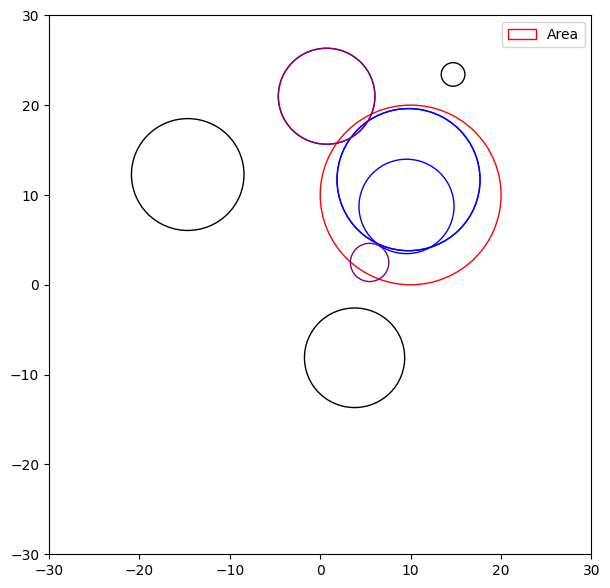

In [141]:
fig, ax = plt.subplots(figsize=(7, 7))

area = plt.Circle((10, 10), ar, color='r', fill=False, label='Area')
ax.add_patch(area)

for p in random.choices(fully_contained_particles, k=3):
    px, py, pr = p
    ax.add_patch(plt.Circle((px, py), pr, color='blue', fill=False))

for p in random.choices(partially_contained_particles, k=3):
    px, py, pr = p
    ax.add_patch(plt.Circle((px, py), pr, color='purple', fill=False))

for p in random.choices(outside_particles, k=3):
    px, py, pr = p
    ax.add_patch(plt.Circle((px, py), pr, color='black', fill=False))

ax.set_xlim((-30, 30))
ax.set_ylim((-30, 30))

ax.legend(loc='best')

##### Activity 6: Plot the particles according to their position

Read the particles from `particles.csv` and plot them using special colors depending if the particle is fully contained, partially contained or not contained at all in the area `(325, 225, 50)`

If the particle is fully contained, it should be colored `green`, if it's partially contained, it should be colored `red`, while if it's outside, it should be black.

(0.0, 510.0)

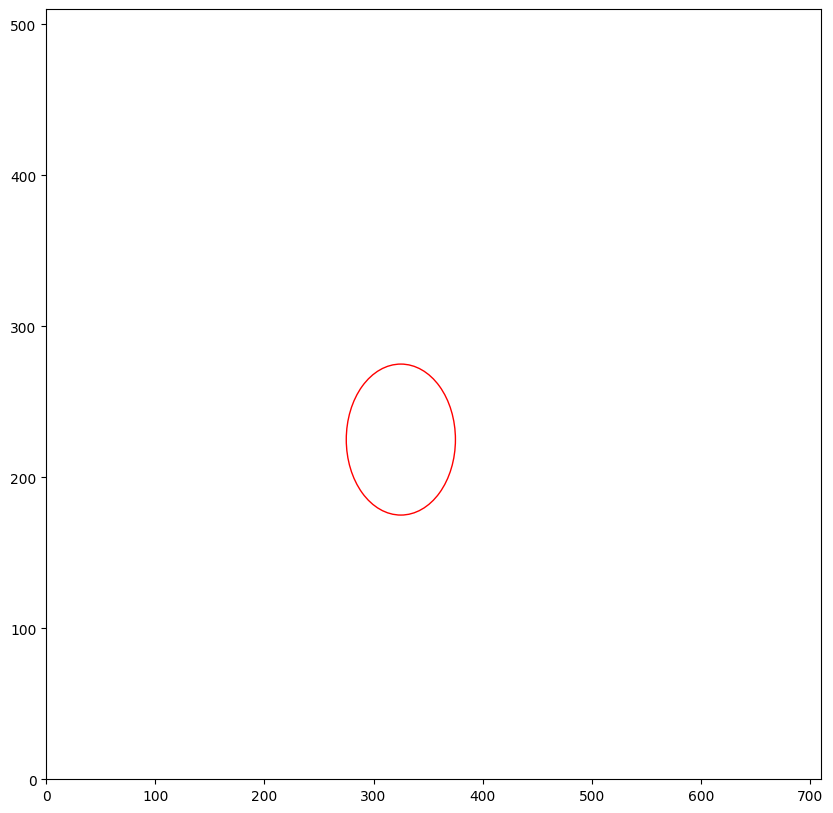

In [159]:
A = (325, 225, 50)

ax, ay, ar = A
fig, axis = plt.subplots(figsize=(10, 10))

area = plt.Circle((ax, ay), ar, color='r', fill=False, label='Area')
axis.add_patch(area)

# Plot your particles here
# ...

axis.set_xlim((0, 710))
axis.set_ylim((0, 510))

Solution:

We'll use pandas to read he particles CSV file:

In [143]:
particles_df = pd.read_csv('particles.csv')

We'll then create the plot using the function previously defined:

(0.0, 510.0)

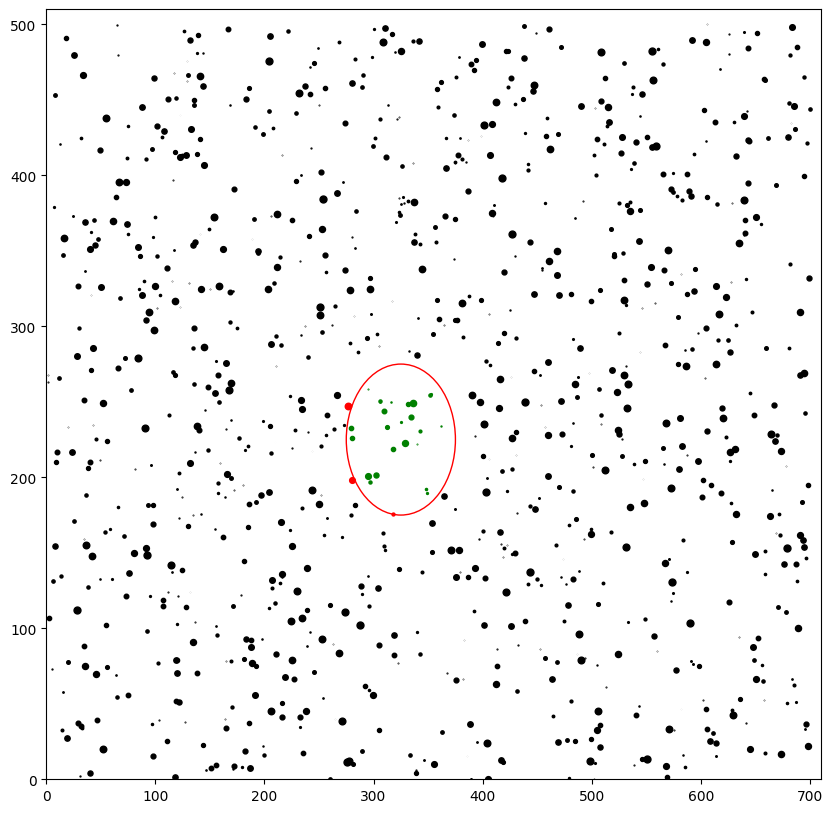

In [160]:
A = (325, 225, 50)
ax, ay, ar = A

fig, axis = plt.subplots(figsize=(10, 10))

area = plt.Circle((ax, ay), ar, color='r', fill=False, label='Area')
axis.add_patch(area)

for p in particles_df.values:
    px, py, pr = p
    position = calculate_particle_position(p, A)
    color = {
        ParticlePosition.PARTIALLY_CONTAINED: "red",
        ParticlePosition.COMPLETELY_CONTAINED: "green",
        ParticlePosition.OUTSIDE: "black"
    }[position]
        
    axis.plot(px, py, marker='o', markersize=pr, color=color)

axis.set_xlim((0, 710))
axis.set_ylim((0, 510))

In [164]:
fig.savefig('expected_plot_2.png')

Assertions:

In [165]:
from matplotlib.testing import compare

fig.savefig('students_plot_2.png')
res = compare.compare_images('expected_plot_2.png', 'students_plot_2.png', tol=0)
res